# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score
from sklearn.svm import l1_min_c
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
filename = os.path.join(os.getcwd(), "data", "adultData.csv")
df = pd.read_csv(filename, header=0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

### Problem Statement
I will be predicting whether an individual earned capital gains (nonzero capital gain) based on 1994 U.S. Census data. I imagine that an organization that wants to predict potential tax fraud may be interested in predicting a person’s expected capital gains, as capital gains are subject to taxes. For example, if a person does not report any capital taxes, but the model predicts that they do, then further investigation might be prudent.

#### Examining the Dataset

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [5]:
print('features:', df.columns)

features: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')


I will be trying to predict whether an individual's `capital-gain` is strictly greater than zero. (Note: this is slightly different from my original plan.) Our dataset already has `capital-gain` and `capital-loss` as continuous variables, so I will convert `capital-gain` to a binary variable by creating two possible labels: `=0` and `>0` (Note that all values in `capital-gain` are non-negative.)

In [6]:
(df['capital-gain'] < 0).sum()

0

In [7]:
# Converts 'capital-gain' into a binary variable
df['capital-gain'] = np.where(df['capital-gain'] == 0, '=0', '>0')
label = 'capital-gain'

We can see that there's a class imbalance that I will address later.

In [8]:
df['capital-gain'].value_counts()

=0    29849
>0     2712
Name: capital-gain, dtype: int64

In [9]:
df.shape

(32561, 15)

In [10]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
count,32399.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561,32561.000000,32236.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,2,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,=0,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,29849,NaN,NaN,29170,24720
mean,38.589216,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,NaN,87.303830,40.450428,NaN,NaN
std,13.647862,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,NaN,402.960219,12.353748,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,45.000000,NaN,NaN


In [11]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain       object
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

I will be one-hot-encoding the categorical variables, so the following code displays the unique values for categorical features in the data.

In [12]:
{col:df[col].unique() for col in df.columns if df.dtypes[col] == 'object'}

{'capital-gain': array(['>0', '=0'], dtype=object),
 'education': array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object),
 'income_binary': array(['<=50K', '>50K'], dtype=object),
 'marital-status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
        'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
        'Widowed'], dtype=object),
 'native-country': array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
        'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
        'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
        'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
        'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
        'China', 'Japan', 'Yugoslavia', 'Peru',
        'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Tr

Let's visualize our numerical features with respect to `capital-gain`, our label. Because most people have no capital gain, I chose to filter out some of the examples with `=0` `capital-gain` to make it easier to observe trends in the following plots.

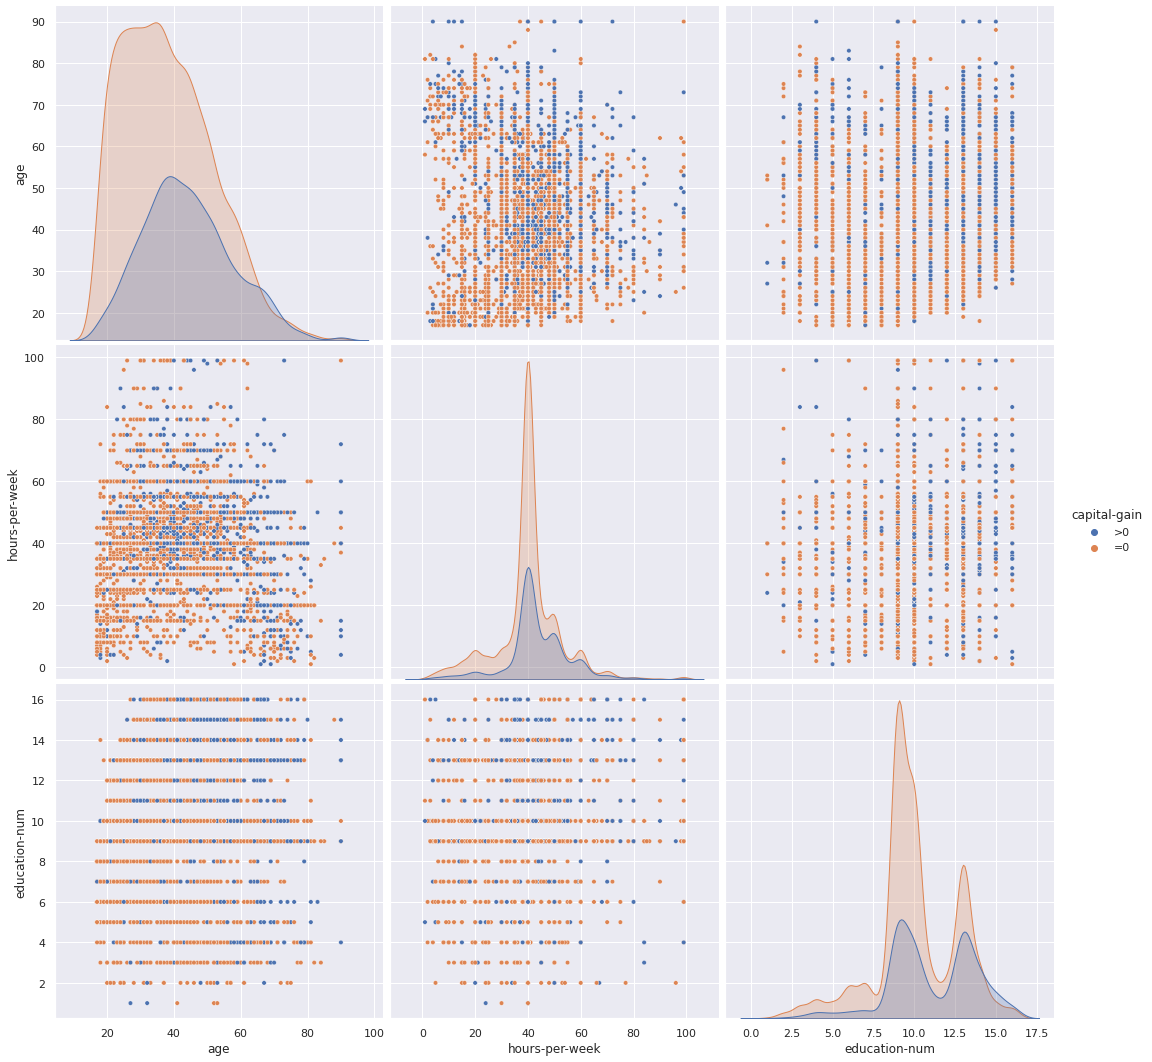

In [13]:
df_maj = df[df[label] == '=0']
indices = np.random.choice(df_maj.index, size=int(0.8*df_maj.shape[0]), replace=False)
df_bal = df.drop(indices)
df_sub = df_bal[['age', 'hours-per-week', 'education-num', label]].copy()
sns.pairplot(data=df_sub, hue = label, plot_kws={'s':20}, height=5)

It appears that higher `capital-gain` is correlated with greater values of `education-num` and `age`, which makes sense, as it requires some knowledge, acrued through years of experience and education, to be able to invest properly and earn higher capital gains. Although it is not as prominant, a similar trend exists for `hours-per-week`, although there is a rather long tail at the high end of `hours-per-week`, suggesting that people who work 90 hours a week or more are most likely making positive capital gains, which makes sense, as constantly trading and monitoring markets requires a lot of time. 

There's a concentration of people both at the youngest and oldest end of the age spectrum that work for very few hours per week, as the youngest is likely still in school or looking for work, and the oldest have retired. Looking at the top-right plot(`age` vs `education-num`), we can see a fairly strong correlation indicating that those who are older and have gone to school for many years tend to have greater capital gains.

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

### Preparing the Data

#### Preliminary Feature Selection

First, I will remove features that I do not intend on using in my final dataset. `fnlwgt` is the number of people the example is believed to represent. However, this isn't terribly useful when prediciting something about an individual, we we will discard this feature as well. `education` can easily be infered from `education-num`, so we will drop `education`. `relationship` can be infered from a combination of `sex_selfID` and `marital-status`, so we're going to remove it as well.

In [14]:
df.drop(columns=['fnlwgt','education', 'relationship'], inplace=True)

In [15]:
df.head()

,age,workclass,education-num,marital-status,occupation,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,13,Never-married,Adm-clerical,White,Non-Female,>0,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Non-Female,=0,0,13.0,United-States,<=50K
2,38.0,Private,9,Divorced,Handlers-cleaners,White,Non-Female,=0,0,40.0,United-States,<=50K
3,53.0,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Non-Female,=0,0,40.0,United-States,<=50K
4,28.0,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,=0,0,40.0,Cuba,<=50K


#### Treating Null Values

Next, I will address null values. Let us see how many missing values we have in our data.

In [16]:
df.isnull().sum()

age                162
workclass         1836
education-num        0
marital-status       0
occupation        1843
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

We can see that the number of missing values in the `age` and `hours-per-week` columns are relatively small compared to the total number of examples. Thus, I chose to simply fill in missing values with their respective averages for each column, documenting which ones were originally null in `age_na` and `hours-per0week_na`, respectively, as these null values will likely not affect the overall data distribution too much.

In [17]:
# Fill missing age with mean value
df['age_na'] = df['age'].isnull()
mean_ages=df['age'].mean()
df['age'].fillna(value=mean_ages, inplace=True)

# Fill missing hours-per-week with mean value
df['hours-per-week_na'] = df['hours-per-week'].isnull()
mean_hours = df['hours-per-week'].mean()
df['hours-per-week'].fillna(value=mean_hours, inplace=True)

Let's verify it worked:

In [18]:
df.head()

,age,workclass,education-num,marital-status,occupation,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age_na,hours-per-week_na
0,39.0,State-gov,13,Never-married,Adm-clerical,White,Non-Female,>0,0,40.0,United-States,<=50K,False,False
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Non-Female,=0,0,13.0,United-States,<=50K,False,False
2,38.0,Private,9,Divorced,Handlers-cleaners,White,Non-Female,=0,0,40.0,United-States,<=50K,False,False
3,53.0,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Non-Female,=0,0,40.0,United-States,<=50K,False,False
4,28.0,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,=0,0,40.0,Cuba,<=50K,False,False


Let's verify it worked.

In [19]:
df['age'].isnull().sum()

0

In [20]:
df['hours-per-week'].isnull().sum()

0

#### Removing Outliers

Now I will examine my data for any outliers. We can see that the min value of `age` is 17 and the max value of `age` is 90 (from `df.describe()` above), which is a reasonable range, so we need not treat any outliers in this feature.

The following code cell defines a function `winsorize` that replaces the input `col` with its winsorized version of itself and prints out information about the bottom and top 1 percent of the data.

In [21]:
def winsorize(col):
    # Examine top and bottom 1 percent
    print('before:')
    col_01 = np.percentile(df[col], 1)
    print(col, '1st percentile:', col_01)
    print('number of examples below 1st percentile', (df[col]<col_01).sum())
    col_99 = np.percentile(df[col], 99)
    print(col, '99th percentile:', col_99)
    print('number of examples above 99th percentile', (df[col]>col_99).sum())

    # Winsorize
    df[col] = stats.mstats.winsorize(df[col], limits=[0.01, 0.01])
    
    # Verify correctness
    print('\nafter:')
    col_01 = np.percentile(df[col], 1)
    print(col, '1st percentile:', col_01)
    print('number of examples below 1st percentile', (df[col]<col_01).sum())
    col_99 = np.percentile(df[col], 99)
    print(col, '99th percentile:', col_99)
    print('number of examples above 99th percentile', (df[col]>col_99).sum())

I chose to replace my `education-num` feature with a winsorized version of itself.

In [22]:
winsorize('education-num')

before:
education-num 1st percentile: 3.0
number of examples below 1st percentile 219
education-num 99th percentile: 16.0
number of examples above 99th percentile 0

after:
education-num 1st percentile: 3.0
number of examples below 1st percentile 0
education-num 99th percentile: 16.0
number of examples above 99th percentile 0


Let us do the same with `hours-per-week`

In [23]:
winsorize('hours-per-week')

before:
hours-per-week 1st percentile: 8.0
number of examples below 1st percentile 291
hours-per-week 99th percentile: 80.0
number of examples above 99th percentile 207

after:
hours-per-week 1st percentile: 8.0
number of examples below 1st percentile 0
hours-per-week 99th percentile: 80.0
number of examples above 99th percentile 0


and `capital-loss`.

In [24]:
winsorize('capital-loss')

before:
capital-loss 1st percentile: 0.0
number of examples below 1st percentile 0
capital-loss 99th percentile: 1980.0
number of examples above 99th percentile 325

after:
capital-loss 1st percentile: 0.0
number of examples below 1st percentile 0
capital-loss 99th percentile: 1980.0
number of examples above 99th percentile 0


For now, I will set all `nan` values in my categorical features to `Unknown`.

In [25]:
for col in df.columns:
    if df.dtypes[col] == 'object':
        df[col].fillna(value='Unknown', inplace=True)

There should be no null values now.

In [26]:
df.isnull().sum()

age                  0
workclass            0
education-num        0
marital-status       0
occupation           0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income_binary        0
age_na               0
hours-per-week_na    0
dtype: int64

#### Consolidating Categorical Feature Labels

Now let's prepare our categorical features. Ultimately, I intend on one-hot-encoding my categorical features so that I can train a logistic regression model on my data, but first, I will try consolidating the different categories for my features to reduce complexity.

The next two cells define functions used for the next part of my data processing.

In [27]:
# Returns ratio of >0/=0 capital gain in each possible category in col (col is a feature)
def proportionByCategory(col):
    res = {}
    categories = df[col].dropna().unique()
    for cat in categories:
        df_filtered = df[df[col] == cat][label]
        val_count = df_filtered.value_counts()
        res[cat] = val_count[0]/df_filtered.shape[0]
    return sorted(res.items(), key=lambda x:x[1], reverse=True)

In [28]:
# Combines categories, a subset of all possible categories of col, into one category called new_cat, updates col
def combineCategories(col, categories, new_cat):
    cond = False
    for cat in categories:
        cond = cond | (df[col] == cat)
    df[col] = np.where(cond, new_cat, df[col])
    return df[col].unique()

Let's start with `workclass`. 

In [29]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [30]:
proportionByCategory('workclass')

[('Never-worked', 1.0),
 ('Unknown', 0.9330065359477124),
 ('Private', 0.9236869933027846),
 ('State-gov', 0.9183359013867488),
 ('Local-gov', 0.9073100812231247),
 ('Federal-gov', 0.9020833333333333),
 ('Self-emp-not-inc', 0.89728453364817),
 ('Without-pay', 0.8571428571428571),
 ('Self-emp-inc', 0.8207885304659498)]

We can see that for each `workclass`, the proportion of people who have no capital gains are close for the different types of government positions. Thus, I combined them into one group, called `Gov`, to decrease complexity.

In [31]:
combineCategories('workclass', ['State-gov', 'Federal-gov', 'Local-gov'], 'Gov')

array(['Gov', 'Self-emp-not-inc', 'Private', 'Unknown', 'Self-emp-inc',
       'Without-pay', 'Never-worked'], dtype=object)

Now let's work on `marital-status`.

In [32]:
df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [33]:
proportionByCategory('marital-status')

[('Never-married', 0.9574089675184874),
 ('Married-spouse-absent', 0.9497607655502392),
 ('Separated', 0.9492682926829268),
 ('Divorced', 0.9351789331532748),
 ('Widowed', 0.9244712990936556),
 ('Married-AF-spouse', 0.9130434782608695),
 ('Married-civ-spouse', 0.8785389957264957)]

I noticed that the distributions of `net-capital-change` are similar for people that are `Divorced`, `Married-spouse-absent` and `Separated`, so I combined these categories into a `Married-apart` group. I deliberated a bit on whether to include `Never-married` in this category, as the distribution looks to be roughly the same shape as the others, but the average was lower that the other three categories enough that I chose to leave it as its own separate category.

In [34]:
combineCategories('marital-status', ['Divorced', 'Married-spouse-absent', 'Separated'], 'Married-apart')

array(['Never-married', 'Married-civ-spouse', 'Married-apart',
       'Married-AF-spouse', 'Widowed'], dtype=object)

#### Note for Native Country

When I was looking at the `native-country` column, I noticed that there were some ambiguous values: `South` and `Hong`. Let's investigate context clues to deduce what these could represent.

In [35]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Unknown', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [36]:
df[df['native-country'] == 'South']['race'].value_counts()

Asian-Pac-Islander    77
Amer-Indian-Inuit      2
White                  1
Name: race, dtype: int64

It appears that most of the people from `South` are labeled as `Asian-Pac-Islander`, leading me to believe that this label represents `South Korea`.

In [37]:
df[df['native-country'] == 'Hong']['race'].value_counts()

Asian-Pac-Islander    17
White                  2
Amer-Indian-Inuit      1
Name: race, dtype: int64

A similar trend is observed with `Hong`, suggesting that this represents `Hong Kong`.

In [38]:
percent_female = np.sum(df['sex_selfID']=='Female')/df['sex_selfID'].shape[0]
percent_female

0.33079450876815825

#### Class Imbalance

We can see that there is a class imbalance with respect to `sex_selfID` and `capital-gain`. This could lead to a biased model if trained on our current data. Later when I train my model, I will address this class imbalance issue in my training set via upsampling. I will wait to upsample after I split my data into training and testing sets so that they remain independent.

In [39]:
df.groupby(['sex_selfID', label]).size()

sex_selfID  capital-gain
Female      =0              10148
            >0                623
Non-Female  =0              19701
            >0               2089
dtype: int64

#### One-Hot Encoding Features

Next, let's one-hot-encode our categorical features: 

In [40]:
df.dtypes.unique()

array([dtype('float64'), dtype('O'), dtype('int64'), dtype('bool')],
      dtype=object)

In [41]:
# Get non-numerical features
to_encode = []
for col in df.columns:
    if df.dtypes[col] == 'object' or df.dtypes[col] == 'bool':
        to_encode.append(col)
to_encode

['workclass',
 'marital-status',
 'occupation',
 'race',
 'sex_selfID',
 'capital-gain',
 'native-country',
 'income_binary',
 'age_na',
 'hours-per-week_na']

In [42]:
encoder = OneHotEncoder(handle_unknown="error", sparse=False)
df_enc = pd.DataFrame(encoder.fit_transform(df[to_encode]))
df_enc.columns = encoder.get_feature_names(to_encode)
df = df.join(df_enc)
df.drop(columns = to_encode ,axis=1, inplace=True)

In [43]:
# Print features
df.columns

Index(['age', 'education-num', 'capital-loss', 'hours-per-week',
       'workclass_Gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_Unknown', 'workclass_Without-pay',
       'marital-status_Married-AF-spouse', 'marital-status_Married-apart',
       'marital-status_Married-civ-spouse', 'marital-status_Never-married',
       'marital-status_Widowed', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'occupation_Unknown',
       'race_Amer-Indian-Inuit', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other'

Our original label `capital-gain` has now been split into two columns: `capital-gain_>0` and `capital-gain_<=0`. It is sufficent to know the truth value for one or the other, since if one of them is true, the other is not true and vice versa. Thus, my new label that I will be predicting will be `capital-gain>0`, and I will drop the other.

In [44]:
label = 'capital-gain_>0'
df.drop(columns='capital-gain_=0', inplace=True)

Similar reasoning applies for `income_binary` and `sex_selfID`.

In [45]:
df.drop(columns=['income_binary_<=50K', 'sex_selfID_Non-Female'], inplace=True)

   Because `=0` is by far the majority class for our label, as mentioned before, I will downsample so that our training set will have a more even balance of `=0` and `>0`. The following function will help us with that.

In [46]:
# Optional parameter percent is the percent of examples that the resulting data set that are in the minority class
# This generates a SettingWithCopy warning, but it's okay because I return the final dataframe and reassign it to df
def downsample(X_sub, y_sub, percent=0.5):
    df_sub = X_sub
    df_sub[label] = y_sub
    
    print('\nbefore:')
    print(y_sub.value_counts())
    
    df_maj = df_sub[df_sub[label] == 0]
    df_sub.drop(df_sub[df_sub[label] == 0].index, inplace=True)
    num_left = int((1-percent)*df_sub.shape[0]/percent)
    df_maj = df_maj.sample(n=num_left, replace=False, random_state=123)
    
    df_sub = df_sub.append(df_maj)
    print('after:')
    print(df_sub[label].value_counts())
    
    return df_sub.drop(columns=label), df_sub[label]

We also need to address the class imbalance with respect to `sex_selfID`, and the following functions will help us do so.

In [47]:
# Returns how many females and non-females there are for each label, used to verify balancing worked
def countsByCategory(col, df_temp):
    res = {}
    categories = df_temp[col].dropna().unique()
    for cat in categories:
        df_filtered = df_temp[df_temp[col] == cat][label]
        res[cat] = df_filtered.value_counts()
    print('Non-Female: \t=0:', res[0][0], '\t>0:', res[0][1])
    print('Female: \t=0:', res[1][0], '\t>0:', res[1][1])
    return res

# Upsamples Female
def balanceGender(X_sub, y_sub):
    df_sub = X_sub
    df_sub[label] = y_sub
    
    print('\nbefore:')
    counts = countsByCategory('sex_selfID_Female', df_sub)
    
    # Calculate number of samples to add
    low_cap_nonfemale, high_cap_nonfemale = counts[0]
    class_balance_nonfemale = high_cap_nonfemale / low_cap_nonfemale
    low_cap_female, high_cap_female = counts[1]
    add_sample_size = int(class_balance_nonfemale*low_cap_female - high_cap_female)
    print('Added', add_sample_size, 'more examples.')
    
    # Sample minority and add to final dataframe
    df_target = df_sub.loc[(df_sub['sex_selfID_Female'] == 1) & (df_sub[label] == 1)]
    df_bal = df_sub.append(df_target.sample(n=add_sample_size, replace=True, random_state=123))
    
    print('\nafter:')
    countsByCategory('sex_selfID_Female', df_bal)
    
    return df_bal.drop(columns=label), df_bal[label]

### Feature Selection

Next, I'll use step-wise feature selection to remove irrelevant features. This way, we can avoid unnecessary complexity in our final models.

We'll first start by training a decision tree. (Note: I use recall as my scoring metric, and I explain that choice later when I evaluate my models. Just trust me for now.)

In [48]:
def getFeatureImportances(top_num):
    # Create labeled examples
    y = df[label]
    X = df.drop(columns=label, axis=1)

    # Split examples into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
    X_train, y_train = downsample(X_train, y_train)
    X_train, y_train = balanceGender(X_train, y_train)
    
    # Perform model selection
    param_grid = {'max_depth':list(range(5,9)), 'min_samples_leaf':list(range(25, 51))}
    model = DecisionTreeClassifier()
    grid = GridSearchCV(model, param_grid, cv=3, scoring='recall')
    grid_search = grid.fit(X_train, y_train)
    best_params = {'max_depth':grid_search.best_estimator_.max_depth, 'min_samples_leaf':grid_search.best_estimator_.min_samples_leaf}
    print('The best params for the model is :', best_params)
    rec = grid_search.best_score_
    print('Recall for the best model is : {:.2f}'.format(rec))

    # Train the model
    feature_select_model = DecisionTreeClassifier(max_depth = best_params['max_depth'], min_samples_leaf = best_params['min_samples_leaf'])
    feature_select_model.fit(X_train, y_train)

    # Plot feature importances
    feature_imp = feature_select_model.feature_importances_
    df_features = pd.DataFrame({'name': X_train.columns.values, 'imp': feature_imp})
    df_sorted = df_features.sort_values('imp', ascending=False)
    top = list(df_sorted.iloc[0:top_num]['name'])
    fig, ax = plt.subplots()
    ax.bar(np.arange(top_num), sorted(feature_select_model.feature_importances_, reverse=True)[:top_num], width = 0.35)
    ax.set_xticks(np.arange(top_num))
    ax.set_xticklabels(top, rotation = 90)
    plt.title('Feature importance from DT')
    ax.set_ylabel('Normalized importance')
    return df_sorted.head(top_num)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """



before:
0.0    23883
1.0     2165
Name: capital-gain_>0, dtype: int64


/home/codio/.local/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


after:
0.0    2165
1.0    2165
Name: capital-gain_>0, dtype: int64

before:
Non-Female: 	=0: 1377 	>0: 1678
Female: 	=0: 788 	>0: 487
Added 159 more examples.

after:
Non-Female: 	=0: 1377 	>0: 1678
Female: 	=0: 788 	>0: 646
The best params for the model is : {'max_depth': 6, 'min_samples_leaf': 39}
Recall for the best model is : 0.68


,name,imp
79,income_binary_>50K,0.707004
2,capital-loss,0.138943
0,age,0.079159
3,hours-per-week,0.015539
1,education-num,0.012973
23,occupation_Other-service,0.010405
36,sex_selfID_Female,0.008305
13,marital-status_Married-civ-spouse,0.006602
19,occupation_Exec-managerial,0.005646
33,race_Black,0.005601


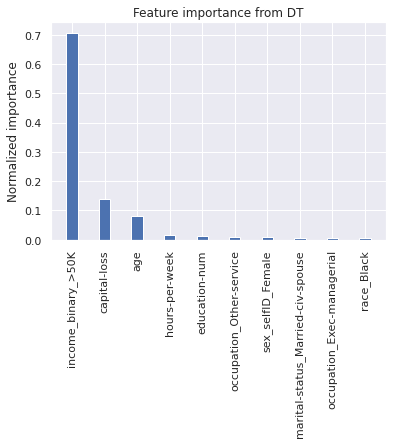

In [49]:
df_imp = getFeatureImportances(10)
df_imp

What immediately jumps out to me is that the feature importance of `income_binary_>50K` is extremely high relative to the others. I believe that this may be an example of feature leakage. Thinking back to my original (hypothetical) business problem, my goal was to detect tax fraud by predicting capital gains. However, if someone were really trying to commit tax fraud by excluding their capital gains, then obviously they would not report their gains as part of their income either. Thus, relying on income would not be a reliable way to predict capital gains. In the spirit of the original business problem, I will remove `income_binary` from my list of features.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/codio/.local/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,



before:
0.0    23883
1.0     2165
Name: capital-gain_>0, dtype: int64
after:
0.0    2165
1.0    2165
Name: capital-gain_>0, dtype: int64

before:
Non-Female: 	=0: 1377 	>0: 1678
Female: 	=0: 788 	>0: 487
Added 159 more examples.

after:
Non-Female: 	=0: 1377 	>0: 1678
Female: 	=0: 788 	>0: 646
The best params for the model is : {'max_depth': 6, 'min_samples_leaf': 25}
Recall for the best model is : 0.75


,name,imp
13,marital-status_Married-civ-spouse,0.275072
1,education-num,0.208050
0,age,0.170294
2,capital-loss,0.135913
3,hours-per-week,0.112343
36,sex_selfID_Female,0.021292
23,occupation_Other-service,0.019812
18,occupation_Craft-repair,0.016220
16,occupation_Adm-clerical,0.011338
9,workclass_Unknown,0.009899


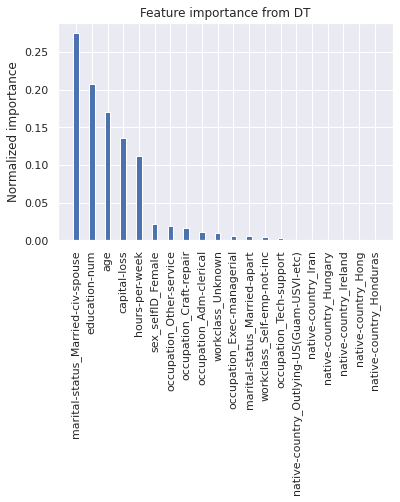

In [50]:
df.drop(columns='income_binary_>50K', inplace=True)
df_imp = getFeatureImportances(20)
df_imp

It appears that the features below the top fourteen have insignificant feature importance. This makes it much simpler! Let's drop everything except the top fourteen features.

In [51]:
top_14 = list(df_imp['name'][:14])
top_14.append(label)
df = df[top_14]
df.columns

Index(['marital-status_Married-civ-spouse', 'education-num', 'age',
       'capital-loss', 'hours-per-week', 'sex_selfID_Female',
       'occupation_Other-service', 'occupation_Craft-repair',
       'occupation_Adm-clerical', 'workclass_Unknown',
       'occupation_Exec-managerial', 'marital-status_Married-apart',
       'workclass_Self-emp-not-inc', 'occupation_Tech-support',
       'capital-gain_>0'],
      dtype='object')

Now we're ready to train models on our data!

In [52]:
df.head()

,marital-status_Married-civ-spouse,education-num,age,capital-loss,hours-per-week,sex_selfID_Female,occupation_Other-service,occupation_Craft-repair,occupation_Adm-clerical,workclass_Unknown,occupation_Exec-managerial,marital-status_Married-apart,workclass_Self-emp-not-inc,occupation_Tech-support,capital-gain_>0
0,0.0,13,39.0,0,40.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,13,50.0,0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,9,38.0,0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,7,53.0,0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,13,28.0,0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Training and Evaluation

I want to try training four different types of models: decision tree, linear regression, random forest, and gradient boosted decision tree. For each model, I will be using `GridSearchCV` to perform model selection (Note: for the ensemble methods, I excluded the grid search from the code to make the code more efficient upon reruns.) The evaluation metric I will be focusing on is recall. In our original business problem, a false negative (predicting 0 capital gain when it's actually >= 0) is more costly than a false positive (prediciting >= capital gain when it's actually 0) because we are trying to identify individuals that are suspected for tax fraud via underreporting capital gains. Once identified, we could then conduct further investigations to ascertain whether the suspicions were correct. Accidentally labeling someone as suspecious (predicting a greater capital gain) is okay, because further investigations would reveal that nothing is wrong. However, missing someone means that they have gotten away with tax fraud, which is illegal.

Let's first create our training and test datasets, balancing for `sex-selfID`.

In [53]:
# Create labeled examples
y = df[label]
X = df.drop(columns=label, axis=1)

# Split examples into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)
X_train, y_train = downsample(X_train, y_train)
X_train, y_train = balanceGender(X_train, y_train)


before:
0.0    20910
1.0     1882
Name: capital-gain_>0, dtype: int64
after:
0.0    1882
1.0    1882
Name: capital-gain_>0, dtype: int64

before:
Non-Female: 	=0: 1247 	>0: 1467
Female: 	=0: 635 	>0: 415
Added 124 more examples.

after:
Non-Female: 	=0: 1247 	>0: 1467
Female: 	=0: 635 	>0: 539


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/codio/.local/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Decision Tree

We've already trained a tree during feature selection, so we'll start with that, this time using only our selected features.

In [54]:
# Find best hyperparameters
param_grid = {'max_depth':list(range(4,9)), 'min_samples_leaf':list(range(25, 51))}
dt_model = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt_model, param_grid, cv=3, scoring='recall')
dt_grid_search = dt_grid.fit(X_train, y_train)
dt_best_params = {'max_depth':dt_grid_search.best_estimator_.max_depth, 'min_samples_leaf':dt_grid_search.best_estimator_.min_samples_leaf}
print('The best params for the DT model is :', dt_best_params)

# Train best model
dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'], min_samples_leaf=dt_best_params['min_samples_leaf'])
dt_model.fit(X_train, y_train)

# Evaluate model
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print('[DT] Accuracy: {0}'.format(dt_acc))
dt_rec = recall_score(y_test, dt_pred)
print('[DT] Recall: {0}'.format(dt_rec))

The best params for the DT model is : {'max_depth': 4, 'min_samples_leaf': 30}
[DT] Accuracy: 0.6428498310983723
[DT] Recall: 0.6457831325301204


#### Linear Regression

Now I'll try linear regression.

In [55]:
# Find best hyperparameters
cs = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)
param_grid = dict(C = list(cs))
lr_model = LogisticRegression(max_iter=1000)
lr_grid = GridSearchCV(lr_model, param_grid, cv=3, scoring='recall')
lr_grid_search = lr_grid.fit(X_train, y_train)
lr_best_params = {'C':lr_grid_search.best_estimator_.C}
print('The best params for the LR model is :', lr_best_params)

# Train best model
lr_model = LogisticRegression(C=lr_best_params['C'], max_iter=1000)
lr_model.fit(X_train, y_train)

# Evaluate model
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print('[LR] Accuracy: {0}'.format(lr_acc))
lr_rec = recall_score(y_test, lr_pred)
print('[LR] Recall: {0}'.format(lr_rec))

The best params for the LR model is : {'C': 1.2114604155309225e-05}
[LR] Accuracy: 0.5262565257447026
[LR] Recall: 0.7578313253012048


Next, I'll try to train some ensemble methods to see if we can get a better performing model.

#### Random Forest

In [56]:
# Train model
rf_model = RandomForestClassifier(max_depth=32, n_estimators=300, random_state=123)
rf_model.fit(X_train, y_train)

# Evaluate model
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print('[RF] Accuracy: {0}'.format(rf_acc))
rf_rec = recall_score(y_test, rf_pred)
print('[RF] Recall: {0}'.format(rf_rec))

[RF] Accuracy: 0.6140853720954038
[RF] Recall: 0.5927710843373494


#### Gradient Boosted Decision Tree

In [57]:
# Train model
gbdt_model = RandomForestClassifier(max_depth=2, n_estimators=50, random_state=123)
gbdt_model.fit(X_train, y_train)

# Evaluate model
gbdt_pred = gbdt_model.predict(X_test)
gbdt_acc = accuracy_score(y_test, gbdt_pred)
print('[GBDT] Accuracy: {0}'.format(gbdt_acc))
gbdt_rec = recall_score(y_test, gbdt_pred)
print('[GBDT] Recall: {0}'.format(gbdt_rec))

[GBDT] Accuracy: 0.5458081686968983
[GBDT] Recall: 0.7698795180722892


#### Comparing Model Performances

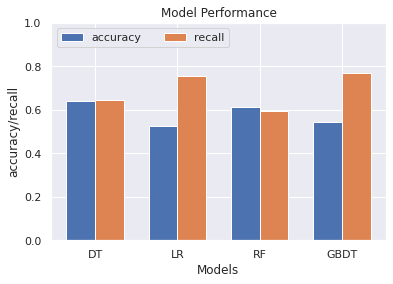

In [58]:
acc_Results = [dt_acc, lr_acc, rf_acc, gbdt_acc]
rec_Results = [dt_rec, lr_rec, rf_rec, gbdt_rec]
labels = ['DT', 'LR', 'RF', 'GBDT']

rg= np.arange(4)
width = 0.35
plt.bar(rg, acc_Results, width, label="accuracy")
plt.bar(rg+width, rec_Results, width, label='recall')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("accuracy/recall")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

### Conclusion
In general, in order to get better recall, we had to sacrifice accuracy. Although all my models had relatively poor accuracy, they had decent recall, which is ideal for the business problem (explained in a previous section). My GBDT had the best recall, although one could argue that the decision tree struck a better balance between recall and accuracy. I was a bit surprised that my random forest model performed so poorly since its an ensemble method, although it might be that the random forest was too complex of a model for the problem that I was trying to tackle.

Given more time, I would extend this project by conditioning on whether the model predicts `>0` `capital-gain` and setting up a regression problem to predict the actual amount of `capital-gain` for an individual with a new model. That way we could predict the amount of `capital-gain` by first running our data through the model that I've trained above, then running the examples that were predicted as `>0` `capital-gain` through this new model to find the actual amount of `capital-gain` for an individual.